<a href="https://colab.research.google.com/github/Mahirweyves/diabetes/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from subprocess import check_output
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score


<ipython-input-1-b462066f7b24>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
pip install pandas_profiling

  Using cached pydantic-2.10.4-py3-none-any.whl.metadata (29 kB)
Using cached pydantic-2.10.4-py3-none-any.whl (431 kB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.19
    Uninstalling pydantic-1.10.19:
      Successfully uninstalled pydantic-1.10.19


In [ ]:
pip install "pydantic<2"


  Using cached pydantic-1.10.19-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (152 kB)
Using cached pydantic-1.10.19-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.4
    Uninstalling pydantic-2.10.4:
      Successfully uninstalled pydantic-2.10.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.20 requires pydantic>=2.7.0, but you have pydantic 1.10.19 which is incompatible.
google-genai 0.3.0 requires pydantic<3.0.0dev,>=2.0.0, but you have pydantic 1.10.19 which is incompatible.
langchain 0.3.12 requires pydantic<3.0.0,>=2.7.4, but you have pydantic 1.10.19 which is incompatible.
langchain-core 0.3.25 requires pydantic<3.0.0,>=2.5.2; python_full_version < "3.12.4", but you have pydantic 1.10.19 which is incompatible.
wan

In [ ]:
data=pd.read_csv("/content/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Showing the details about the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Statistical details of the dataset

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking for NaN Values(Preprocessing)

In [ ]:
data.isna().any()

,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


Understanding correlation between the labels

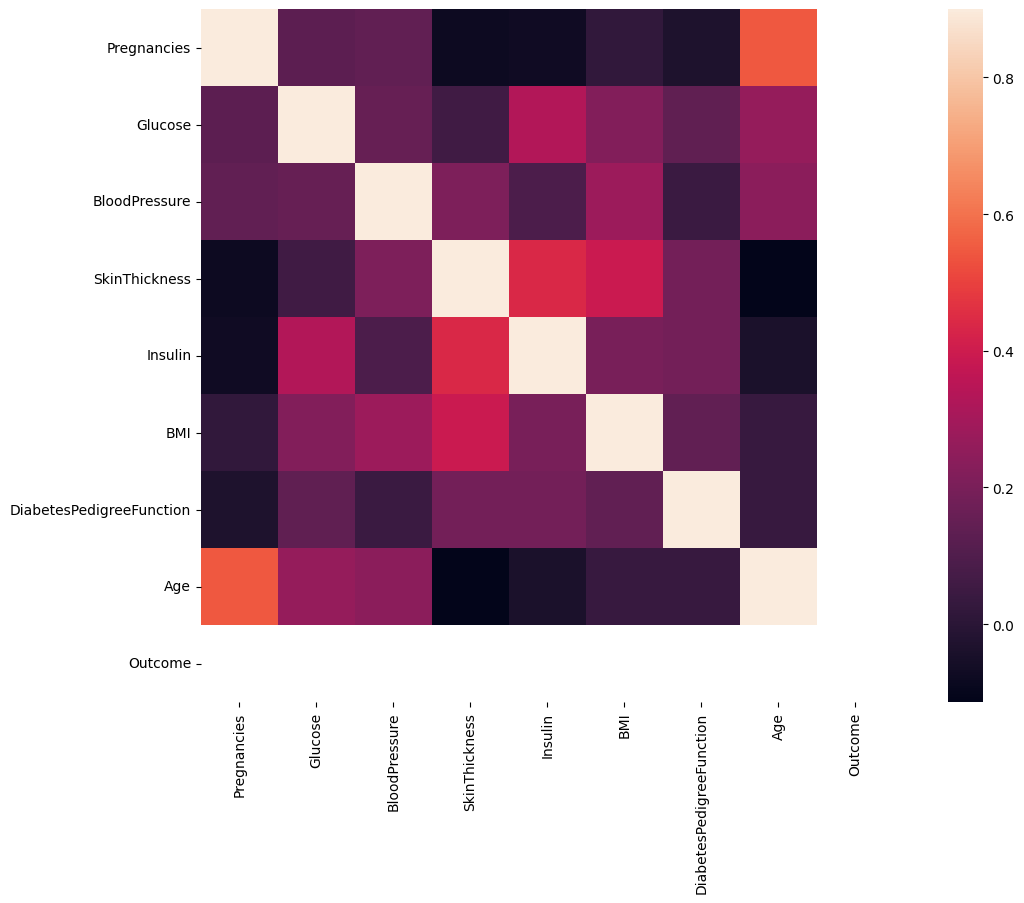

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                           NaN       NaN            NaN            NaN   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [ ]:
Correlation_metrics = data.corr()
fig = plt.figure(figsize = (14, 9))
sns.heatmap(Correlation_metrics, vmax = .9, square = True) #annot = value
plt.show()
print(Correlation_metrics)

Number of people with no Diabetes

In [ ]:
No_sugar = 0  # Initialize the counter
result = data['Outcome']
for i in range(len(result)):
 #print()
 if result[i]==0:
  No_sugar = No_sugar+1
print(No_sugar)


500


Number of people with Diabetes

In [ ]:
Sugar = 0  # Initialize the counter
result = data['Outcome']
for i in range(len(result)):
 #print()
 if result[i]==1:
  Sugar = Sugar+1
print(Sugar)

268


Printing count plot with Seaborn



Text(0.5, 1.0, 'No Diabetes vs Diabetes')

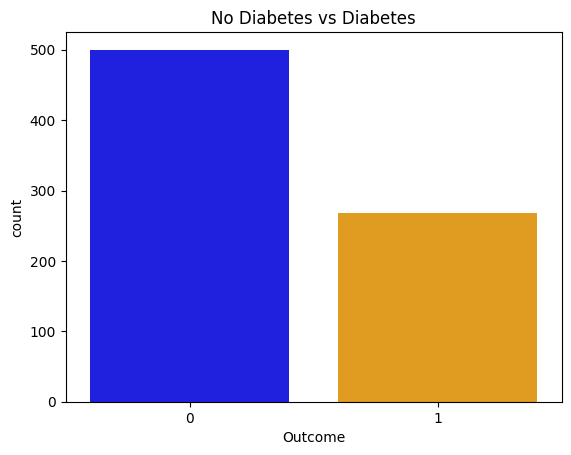

In [ ]:
## creating count plot with title using seaborn
sns.countplot(x='Outcome', data=data, hue='Outcome', palette=['blue', 'orange'], legend=False)
plt.title("No Diabetes vs Diabetes")

Splitting the training and testing dataset

In [ ]:
x=data.drop(['Outcome'], axis = 1) #drop the target variable
y=data['Outcome']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 42)

Using Logistic Regression

In [ ]:
L=LogisticRegression()
L.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=L.predict(xtest)

Confusion Matrix

In [ ]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[78 21]
 [18 37]]


Final accuracy score

In [ ]:
accuracy= L.score(xtest,ytest)

print('Accuracy score of the logistics regression model:', accuracy*100, '%')

Accuracy score of the logistics regression model: 74.67532467532467 %
